In [24]:
import numpy as np
from time import time
import scipy as sc
import matplotlib.pyplot as plt
import sys
import seaborn as sns
%matplotlib inline

In [25]:
sys.path.append('./lib/source/')

from errors import *
from data import *
from methods import *

In [26]:
all_methods = ['SVT', 
               'SoftImpute',
               'SVP',
               'RISMF']

sample_fraction = 0.1
rank = 5
dims = (200, 200)
max_iter = int(1e3)
tol = 1e-4
nsamp = int(sample_fraction * np.prod(dims))

M = get_data('synthetic', rank, dims, noise='y')
omega = sampling_operator(nsamp, dims)
data = get_sampling_vector(M, omega)

t0 = time()
X_svt = get_completion(omega, data, rank, dims, 'SVT', max_iter, tol)
t1 = time()
print 'RMSE error: %f. Time: %d min %d sec.' % (RMSE(X_svt, M), int(t1-t0) // 60, int(t1-t0) % 60)

t0 = time()
X_svp = get_completion(omega, data, rank, dims, 'SVP', max_iter, tol)
t1 = time()
print 'RMSE error: %f. Time: %d min %d sec.' % (RMSE(X_svp, M), int(t1-t0) // 60, int(t1-t0) % 60)

t0 = time()
X_si = get_completion(omega, data, rank, dims, 'SoftImpute', int(max_iter), tol)
t1 = time()
print 'RMSE error: %f. Time: %d min %d sec.' % (RMSE(X_si, M), int(t1-t0) // 60, int(t1-t0) % 60)

RMSE error: 1.738117. Time: 0 min 50 sec.
RMSE error: 0.001666. Time: 0 min 9 sec.
RMSE error: 0.254137. Time: 0 min 1 sec.


# Experiments with synthetic data

## 1 Fixed matrix size, fixed rank, different number of samples

In [27]:
sample_fraction_array = np.linspace(0.1, 0.9, 9)
rank = 5
dims = (100, 100)
max_iter = int(1e2)
tol = 1e-2

M = get_data('synthetic', rank, dims, noise='y')

### Soft-Impute

In [28]:
method = 'SoftImpute'
RMSE_si_array = []
time_si_array = []

for sample_fraction in sample_fraction_array:
    nsamp = int(sample_fraction * np.prod(dims))
    omega = sampling_operator(nsamp, dims)
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_si = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_si_array.append(RMSE(X_si, M))
    time_si_array.append(t1-t0)
    
    print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
    (sample_fraction, RMSE(X_si, M), int(t1-t0) // 60, int(t1-t0) % 60)

Sample fraction: 0.10. RMSE error: 1.727190. Time: 0 min 0 sec.
Sample fraction: 0.20. RMSE error: 0.284350. Time: 0 min 0 sec.
Sample fraction: 0.30. RMSE error: 0.118860. Time: 0 min 0 sec.
Sample fraction: 0.40. RMSE error: 0.083849. Time: 0 min 0 sec.
Sample fraction: 0.50. RMSE error: 0.065284. Time: 0 min 0 sec.
Sample fraction: 0.60. RMSE error: 0.052228. Time: 0 min 0 sec.
Sample fraction: 0.70. RMSE error: 0.041534. Time: 0 min 0 sec.
Sample fraction: 0.80. RMSE error: 0.031401. Time: 0 min 0 sec.
Sample fraction: 0.90. RMSE error: 0.022399. Time: 0 min 0 sec.


### SVP

In [29]:
method = 'SVP'
RMSE_svp_array = []
time_svp_array = []

for sample_fraction in sample_fraction_array:
    nsamp = int(sample_fraction * np.prod(dims))
    omega = sampling_operator(nsamp, dims)
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_svp = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_svp_array.append(RMSE(X_svp, M))
    time_svp_array.append(t1-t0)
    
    print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
    (sample_fraction, RMSE(X_svp, M), int(t1-t0) // 60, int(t1-t0) % 60)

Sample fraction: 0.10. RMSE error: 1.912811. Time: 0 min 0 sec.
Sample fraction: 0.20. RMSE error: 0.112831. Time: 0 min 0 sec.
Sample fraction: 0.30. RMSE error: 0.049588. Time: 0 min 0 sec.
Sample fraction: 0.40. RMSE error: 0.034521. Time: 0 min 0 sec.
Sample fraction: 0.50. RMSE error: 0.033232. Time: 0 min 0 sec.
Sample fraction: 0.60. RMSE error: 0.016674. Time: 0 min 0 sec.
Sample fraction: 0.70. RMSE error: 0.015099. Time: 0 min 0 sec.
Sample fraction: 0.80. RMSE error: 0.015529. Time: 0 min 0 sec.
Sample fraction: 0.90. RMSE error: 0.020085. Time: 0 min 0 sec.


### SVT

In [30]:
method = 'SVT'
RMSE_svt_array = []
time_svt_array = []

for sample_fraction in sample_fraction_array:
    nsamp = int(sample_fraction * np.prod(dims))
    omega = sampling_operator(nsamp, dims)
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_svt = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_svt_array.append(RMSE(X_svt, M))
    time_svt_array.append(t1-t0)
    
    print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
    (sample_fraction, RMSE(X_svt, M), int(t1-t0) // 60, int(t1-t0) % 60)

Sample fraction: 0.10. RMSE error: 2.473628. Time: 0 min 1 sec.
Sample fraction: 0.20. RMSE error: 1.400673. Time: 0 min 1 sec.
Sample fraction: 0.30. RMSE error: 0.249888. Time: 0 min 1 sec.
Sample fraction: 0.40. RMSE error: 0.044608. Time: 0 min 0 sec.
Sample fraction: 0.50. RMSE error: 0.034878. Time: 0 min 0 sec.
Sample fraction: 0.60. RMSE error: 0.031704. Time: 0 min 0 sec.
Sample fraction: 0.70. RMSE error: 0.028948. Time: 0 min 0 sec.
Sample fraction: 0.80. RMSE error: 0.024421. Time: 0 min 0 sec.
Sample fraction: 0.90. RMSE error: 0.022656. Time: 0 min 0 sec.


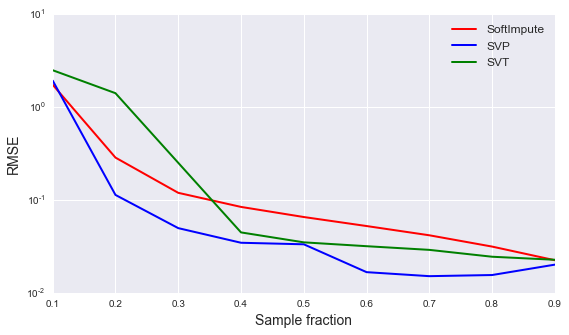

In [57]:
plt.figure(figsize=(9,5))
plt.xlim((0.1, 0.9))
plt.semilogy(sample_fraction_array, RMSE_si_array, 'r', linewidth=2)
plt.semilogy(sample_fraction_array, RMSE_svp_array, 'b', linewidth=2)
plt.semilogy(sample_fraction_array, RMSE_svt_array, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], fontsize=12)
plt.xlabel('Sample fraction', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.savefig('./results/synthetic_nsamp_rmse.png')
plt.show()

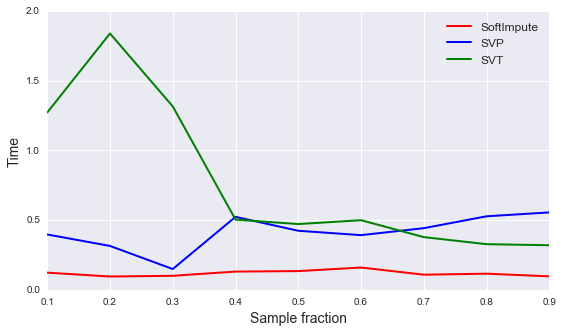

In [58]:
plt.figure(figsize=(9,5))
plt.xlim((0.1, 0.9))
plt.plot(sample_fraction_array, time_si_array, 'r', linewidth=2)
plt.plot(sample_fraction_array, time_svp_array, 'b', linewidth=2)
plt.plot(sample_fraction_array, time_svt_array, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], fontsize=12)
plt.xlabel('Sample fraction', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.savefig('./results/synthetic_nsamp_time.png')
plt.show()

## 2 Fixed matrix size, fixed number of samples, different rank

In [59]:
sample_fraction = 0.2
rank_array = range(5, 56, 5)
dims = (100, 100)
max_iter = int(1e2)
tol = 1e-2

nsamp = int(sample_fraction * np.prod(dims))
omega = sampling_operator(nsamp, dims)

In [60]:
method = 'SoftImpute'
RMSE_si_array = []
time_si_array = []

for rank in rank_array:
    M = get_data('synthetic', rank, dims, noise='y')
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_si = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_si_array.append(RMSE(X_si, M))
    time_si_array.append(t1-t0)
    
    print 'Matrix rank: %d. RMSE error: %.6f. Time: %d min %d sec.' % \
    (rank, RMSE(X_si, M), int(t1-t0) // 60, int(t1-t0) % 60)

Matrix rank: 5. RMSE error: 0.284350. Time: 0 min 0 sec.
Matrix rank: 10. RMSE error: 2.309935. Time: 0 min 0 sec.
Matrix rank: 15. RMSE error: 3.187498. Time: 0 min 0 sec.
Matrix rank: 20. RMSE error: 3.969809. Time: 0 min 0 sec.
Matrix rank: 25. RMSE error: 4.405223. Time: 0 min 0 sec.
Matrix rank: 30. RMSE error: 4.947679. Time: 0 min 0 sec.
Matrix rank: 35. RMSE error: 5.273759. Time: 0 min 0 sec.
Matrix rank: 40. RMSE error: 5.620054. Time: 0 min 0 sec.
Matrix rank: 45. RMSE error: 6.033915. Time: 0 min 0 sec.
Matrix rank: 50. RMSE error: 6.322928. Time: 0 min 0 sec.
Matrix rank: 55. RMSE error: 6.679677. Time: 0 min 0 sec.


In [61]:
method = 'SVP'
RMSE_svp_array = []
time_svp_array = []

for rank in rank_array:
    M = get_data('synthetic', rank, dims, noise='y')
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_svp = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_svp_array.append(RMSE(X_svp, M))
    time_svp_array.append(t1-t0)
    
    print 'Matrix rank: %d. RMSE error: %.6f. Time: %d min %d sec.' % \
    (rank, RMSE(X_svp, M), int(t1-t0) // 60, int(t1-t0) % 60)

Matrix rank: 5. RMSE error: 0.112831. Time: 0 min 0 sec.
Matrix rank: 10. RMSE error: 2.681245. Time: 0 min 0 sec.
Matrix rank: 15. RMSE error: 3.436338. Time: 0 min 0 sec.
Matrix rank: 20. RMSE error: 4.100744. Time: 0 min 0 sec.
Matrix rank: 25. RMSE error: 4.563600. Time: 0 min 0 sec.
Matrix rank: 30. RMSE error: 5.102339. Time: 0 min 0 sec.
Matrix rank: 35. RMSE error: 5.354919. Time: 0 min 0 sec.
Matrix rank: 40. RMSE error: 5.712777. Time: 0 min 0 sec.
Matrix rank: 45. RMSE error: 6.101209. Time: 0 min 0 sec.
Matrix rank: 50. RMSE error: 6.361055. Time: 0 min 0 sec.
Matrix rank: 55. RMSE error: 6.737095. Time: 0 min 0 sec.


In [63]:
method = 'SVT'
RMSE_svt_array = []
time_svt_array = []

for rank in rank_array:
    M = get_data('synthetic', rank, dims, noise='y')
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_svt = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_svt_array.append(RMSE(X_svt, M))
    time_svt_array.append(t1-t0)
    
    print 'Matrix rank: %d. RMSE error: %.6f. Time: %d min %d sec.' % \
    (rank, RMSE(X_svt, M), int(t1-t0) // 60, int(t1-t0) % 60)

Matrix rank: 5. RMSE error: 1.400673. Time: 0 min 1 sec.
Matrix rank: 10. RMSE error: 2.990045. Time: 0 min 1 sec.
Matrix rank: 15. RMSE error: 3.487767. Time: 0 min 2 sec.
Matrix rank: 20. RMSE error: 5.011175. Time: 0 min 2 sec.
Matrix rank: 25. RMSE error: 5.447806. Time: 0 min 3 sec.
Matrix rank: 30. RMSE error: 6.665194. Time: 0 min 2 sec.
Matrix rank: 35. RMSE error: 7.112372. Time: 0 min 2 sec.
Matrix rank: 40. RMSE error: 6.189828. Time: 0 min 2 sec.
Matrix rank: 45. RMSE error: 6.865071. Time: 0 min 1 sec.
Matrix rank: 50. RMSE error: 6.948147. Time: 0 min 2 sec.
Matrix rank: 55. RMSE error: 7.790581. Time: 0 min 2 sec.


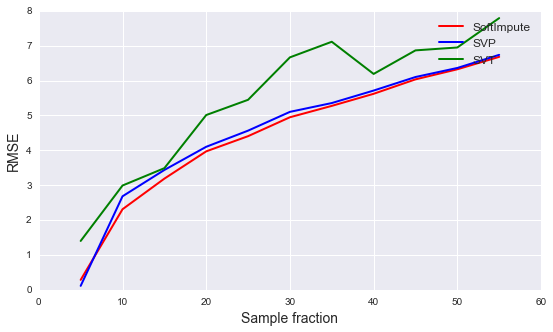

In [66]:
plt.figure(figsize=(9,5))
plt.plot(rank_array, RMSE_si_array, 'r', linewidth=2)
plt.plot(rank_array, RMSE_svp_array, 'b', linewidth=2)
plt.plot(rank_array, RMSE_svt_array, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], fontsize=12)
plt.xlabel('Sample fraction', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.savefig('./results/synthetic_rank_rmse.png')
plt.show()

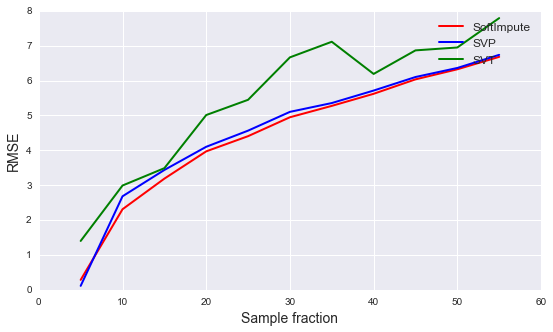

In [68]:
plt.figure(figsize=(9,5))
plt.plot(rank_array, RMSE_si_array, 'r', linewidth=2)
plt.plot(rank_array, RMSE_svp_array, 'b', linewidth=2)
plt.plot(rank_array, RMSE_svt_array, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], fontsize=12)
plt.xlabel('Sample fraction', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.savefig('./results/synthetic_rank_time.png')
plt.show()

# Real data experiment

In [87]:
sample_fraction_array = np.linspace(0.1, 0.9, 9)
rank = 5
max_iter = int(1e3)
tol = 1e-3

M = get_data('real', -1, -1, row_num=1000)
dims = M.shape

### Soft-Impute

In [81]:
method = 'SoftImpute'
RMSE_si_array = []
time_si_array = []

for sample_fraction in sample_fraction_array:
    nsamp = int(sample_fraction * np.prod(dims))
    omega = sampling_operator(nsamp, dims)
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_si = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_si_array.append(RMSE(X_si, M))
    time_si_array.append(t1-t0)
    
    print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
    (sample_fraction, RMSE(X_si, M), int(t1-t0) // 60, int(t1-t0) % 60)

Sample fraction: 0.10. RMSE error: 5.621021. Time: 0 min 0 sec.
Sample fraction: 0.20. RMSE error: 5.034897. Time: 0 min 0 sec.
Sample fraction: 0.30. RMSE error: 3.972201. Time: 0 min 0 sec.
Sample fraction: 0.40. RMSE error: 3.526302. Time: 0 min 0 sec.
Sample fraction: 0.50. RMSE error: 2.946464. Time: 0 min 0 sec.
Sample fraction: 0.60. RMSE error: 2.567393. Time: 0 min 0 sec.
Sample fraction: 0.70. RMSE error: 2.164134. Time: 0 min 0 sec.
Sample fraction: 0.80. RMSE error: 1.733466. Time: 0 min 0 sec.
Sample fraction: 0.90. RMSE error: 1.252003. Time: 0 min 0 sec.


### SVP

In [82]:
method = 'SVP'
RMSE_svp_array = []
time_svp_array = []

for sample_fraction in sample_fraction_array:
    nsamp = int(sample_fraction * np.prod(dims))
    omega = sampling_operator(nsamp, dims)
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_svp = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_svp_array.append(RMSE(X_svp, M))
    time_svp_array.append(t1-t0)
    
    print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
    (sample_fraction, RMSE(X_svp, M), int(t1-t0) // 60, int(t1-t0) % 60)

Sample fraction: 0.10. RMSE error: 6.980483. Time: 0 min 0 sec.
Sample fraction: 0.20. RMSE error: 6.444401. Time: 0 min 2 sec.
Sample fraction: 0.30. RMSE error: 4.782004. Time: 0 min 3 sec.
Sample fraction: 0.40. RMSE error: 4.403566. Time: 0 min 3 sec.
Sample fraction: 0.50. RMSE error: 3.726061. Time: 0 min 4 sec.
Sample fraction: 0.60. RMSE error: 3.613139. Time: 0 min 4 sec.
Sample fraction: 0.70. RMSE error: 3.655103. Time: 0 min 5 sec.
Sample fraction: 0.80. RMSE error: 3.705956. Time: 0 min 5 sec.
Sample fraction: 0.90. RMSE error: 3.784400. Time: 0 min 6 sec.


### SVT

In [ ]:
method = 'SVT'
RMSE_svt_array = []
time_svt_array = []

for sample_fraction in sample_fraction_array:
    nsamp = int(sample_fraction * np.prod(dims))
    omega = sampling_operator(nsamp, dims)
    data = get_sampling_vector(M, omega)
    t0 = time()
    X_svt = get_completion(omega, data, rank, dims, method, max_iter, tol, verbose=False)
    t1 = time()
    RMSE_svt_array.append(RMSE(X_svt, M))
    time_svt_array.append(t1-t0)
    
    print 'Sample fraction: %.2f. RMSE error: %.6f. Time: %d min %d sec.' % \
    (sample_fraction, RMSE(X_svt, M), int(t1-t0) // 60, int(t1-t0) % 60)

In [ ]:
plt.figure(figsize=(9,5))
plt.xlim((0.1, 0.9))
plt.semilogy(sample_fraction_array, RMSE_si_array, 'r', linewidth=2)
plt.semilogy(sample_fraction_array, RMSE_svp_array, 'b', linewidth=2)
plt.semilogy(sample_fraction_array, RMSE_svt_array, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], fontsize=12)
plt.xlabel('Sample fraction', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.savefig('./results/real_nsamp_rmse.png')
plt.show()

In [ ]:
plt.figure(figsize=(9,5))
plt.xlim((0.1, 0.9))
plt.plot(sample_fraction_array, time_si_array, 'r', linewidth=2)
plt.plot(sample_fraction_array, time_svp_array, 'b', linewidth=2)
plt.plot(sample_fraction_array, time_svt_array, 'g', linewidth=2)
plt.legend(['SoftImpute', 'SVP', 'SVT'], fontsize=12)
plt.xlabel('Sample fraction', fontsize=14)
plt.ylabel('Time', fontsize=14)
plt.savefig('./results/real_nsamp_time.png')
plt.show()